<a href="https://colab.research.google.com/github/rajy4683/S9EVA4/blob/master/S9EVA4_SingleScript1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive')
import sys

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



### **[RekogNizer library](https://github.com/rajy4683/RekogNizer.git) contains the following files:**
```
1. basemodelclass.py:   Contains core model definitions. 
2. fileutils.py:        Contains utility functions for model_name_generation, plotting functions 
3. dataloader.py:       Contains dataloaders for both training and test data
4. traintest.py:        Contains core training, test and model execution flow routines. 
5. logger.py:           Contains functions to handle WANDB integration
6. hyperparams.py:      Contains values of default hyperparameters alongwith getter and setter functions   
7. train_s7_new.py:     Main wrapper script or point of entry. It parses hyperparameters as arguments
8. requirements.txt:    Specific libraries that need to be available in the environment
```








#### Downloading and installing dependencies from the GitHub link:


In [0]:
!git clone https://github.com/rajy4683/RekogNizer.git /content/drive/My\ Drive/EVA4/RekogNizer

In [16]:
!pip install -r /content/drive/My\ Drive/EVA4/RekogNizer/requirements.txt

In [17]:
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-84tg56ss
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-84tg56ss
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=64514 sha256=db8a614eaed9f31467317983e95be143817e726dbd9daba1fade9c511669af3a
  Stored in directory: /tmp/pip-ephem-wheel-cache-2obdstnq/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.4.5
    Uninstalling albumentations-0.4.5:
      Successfully uninstalled albumentations-0.4.5


In [18]:
!pip install --upgrade pyforest

Requirement already up-to-date: pyforest in /usr/local/lib/python3.6/dist-packages (1.0.2)


In [19]:
!python -m pyforest install_extensions

Starting to install pyforest extensions for Jupyter Notebook and Jupyter Lab

Trying to install pyforest nbextension...

Finished installing the pyforest Jupyter Notebook nbextension
Please reload your Jupyter notebook browser window

Trying to install pyforest labextension...
Could not install pyforest Jupyter Lab extension because Jupyter Lab is not available

Finished installing the pyforest Jupyter extensions
Please reload your Jupyter notebook and/or Jupyter lab browser windows


#### WANDB client login

In [20]:
!wandb login a6f947d2d2f69e7a8c8ca0f69811fd554f27d204

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
Successfully logged in to Weights & Biases!


In [0]:
sys.path.append('/content/drive/My Drive/EVA4/')
sys.path.append('/content/drive/My Drive/EVA4/RekogNizer')

In [0]:
#!cp /content/drive/My\ Drive/EVA4/RekogNizer/train_s8_new.py /content/drive/My\ Drive/EVA4/RekogNizer/train_s9_new.py

train_s8_new.py currently can take JSON formatted string as input. Following parameters are configurable and are used in the model training and execution.
```
{"project": "news5", 
 "sched_lr_gamma": 0.5, 
 "no_cuda": false, 
 "dropout": 0.1, 
 "test_batch_size": 128, 
 "batch_size": 128, 
 "epochs": 45, 
 "bias": false, 
 "lr": 0.001, 
 "start_lr": 0, 
 "sched_lr_step": 1, 
 "weight_decay": 0.0, 
 "seed": 1, 
 "momentum": 0.9}

```


In [22]:
!python /content/drive/My\ Drive/EVA4/RekogNizer/train_s9_new.py -p '{"lr":0.21694816106338752,"dropout":0.1, "momentum":0.7062620648684866, "epochs":30, "weight_decay":0.00015753761358641488}'

Setting  lr  =  0.21694816106338752
Setting  dropout  =  0.1
Setting  momentum  =  0.7062620648684866
Setting  epochs  =  30
Setting  weight_decay  =  0.00015753761358641488
Final Hyperparameters
             dropout : 0.1 
          batch_size : 128 
     test_batch_size : 128 
                  lr : 0.21694816106338752 
            momentum : 0.7062620648684866 
             no_cuda : False 
                seed : 1 
              epochs : 30 
                bias : False 
      sched_lr_gamma : 0.5 
       sched_lr_step : 1 
            start_lr : 0 
        weight_decay : 0.00015753761358641488 
             project : news5 
Initializing datasets and dataloaders
Files already downloaded and verified
Files already downloaded and verified
wandb: Tracking run with wandb version 0.8.29
wandb: Run data is saved locally in wandb/run-20200315_113512-2idg4amp
wandb: Syncing run peach-pine-812
wandb: ⭐️ View project at https://app.wandb.ai/rajy4683/news5
wandb: 🚀 View run at https://app.wan

#### The APIs for inferencing and plotting are moved out of the training script.


In [0]:
from RekogNizer import traintest
from RekogNizer import logger
from RekogNizer import fileutils
from RekogNizer import basemodelclass
from RekogNizer import dataloader

import pandas as pd
import numpy as np
import torch

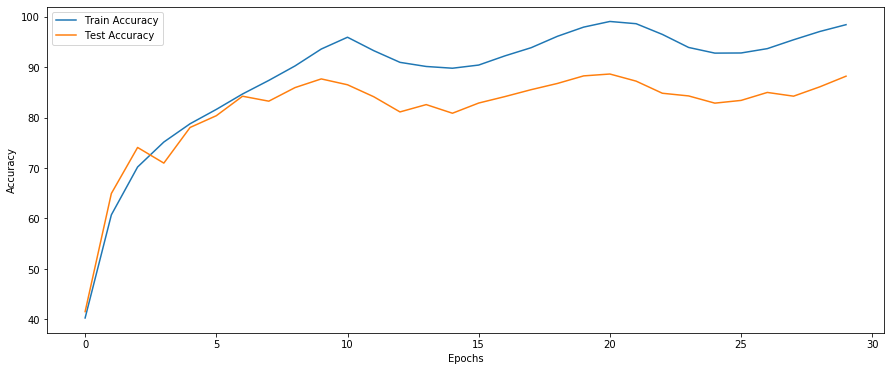

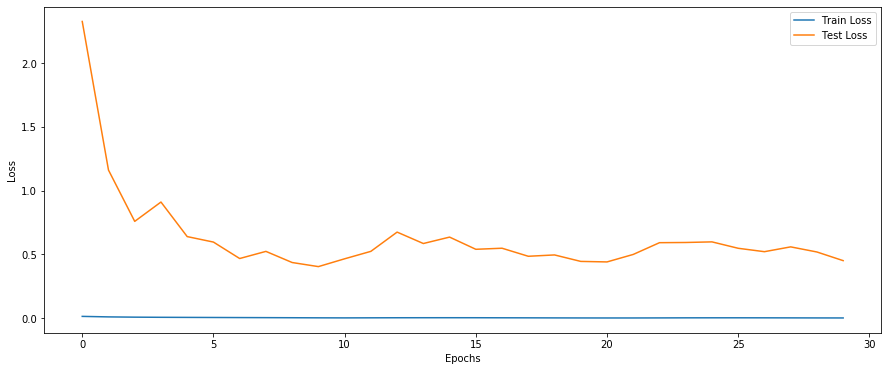

In [24]:
run_list = ['rajy4683/news5/runs/2idg4amp']
runs_df = logger.get_wandb_dataframes(run_list=run_list)#(project="rajy4683/news5",count=1)
new_df = pd.DataFrame().append(runs_df)


fileutils.plot_graphs([new_df],
            ['Train Accuracy', 'Test Accuracy'],
            columns=['Train Accuracy', 'Test Accuracy'],
            xlabel="Epochs",
            ylabel="Accuracy")

fileutils.plot_graphs([new_df],
            ['Train Loss', 'Test Loss'],
            columns=['Train Loss', 'Test Loss'],
            xlabel="Epochs",
            ylabel="Loss")

In [27]:
%load_ext autoreload
%autoreload 2
from RekogNizer import traintest
import torchvision.transforms as transforms
import torchvision

my_model,acc = traintest.model_builder2(basemodelclass.ResNet18(), weights_path="/content/drive/My Drive/EVA4/model_saves/model-22e022c81d.h5")
#class_accuracy_dict = traintest.classwise_accuracy(my_model, testloader, classes, device=torch.device("cpu"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
from RekogNizer import hyperparams
transform_test = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                    download=True, transform=transform_test)
testloader = dataloader.get_dataloader(testset, hyperparams.hyperparameter_defaults['batch_size'], shuffle=False, num_workers=2)
class_accuracy_dict = traintest.classwise_accuracy(my_model, testloader, dataloader.classes, device=torch.device("cuda"))

Files already downloaded and verified
Accuracy of plane : 87 %
Accuracy of   car : 94 %
Accuracy of  bird : 78 %
Accuracy of   cat : 74 %
Accuracy of  deer : 87 %
Accuracy of   dog : 82 %
Accuracy of  frog : 90 %
Accuracy of horse : 90 %
Accuracy of  ship : 94 %
Accuracy of truck : 89 %


<BarContainer object of 10 artists>

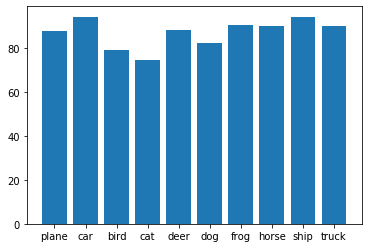

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar([key for key in class_accuracy_dict.keys()],[val for val in class_accuracy_dict.values()])